In [123]:
import os
import gc
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.preprocessing import KBinsDiscretizer,Binarizer
from sklearn.impute import SimpleImputer



In [91]:
train_df = pd.read_csv("../train.csv")
test_df = pd.read_csv("../testA.csv")

In [92]:
#定类特征
category_feature_list = ['verificationStatus','issueDate','purpose','postCode','regionCode',
                 'initialListStatus','applicationType','earliesCreditLine','title','policyCode']
#定序特征
order_feature_list = ['term','grade','subGrade','employmentLength','homeOwnership']

#定量特征
numerical_feature_list = ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle',
 'annualIncome', 'isDefault', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh',
 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'n0',
 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']

In [106]:
def PlotNumFeautre(col):
    fig,ax = plt.subplots(figsize = (15, 6))
    sns.histplot(data = train_df, x = col,hue = 'isDefault', ax = ax)
    print("max:{}, min:{}".format(max(train_df[col]), min(train_df[col])))

# 1. numerical feature binning

## 1.1 loanAmnt ——bining

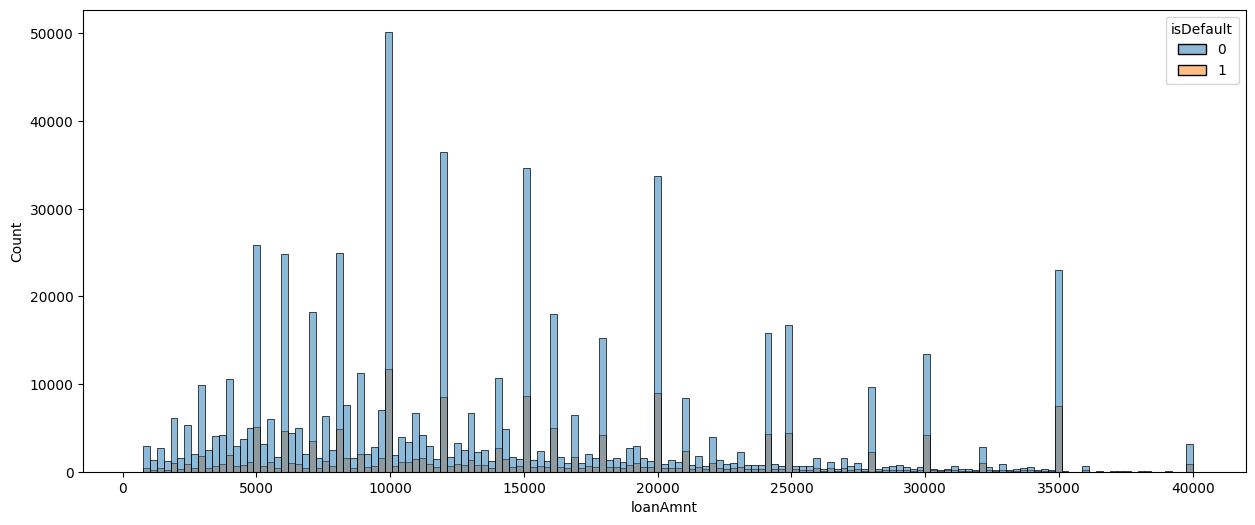

In [94]:
PlotNumFeautre('loanAmnt')

In [96]:
#根据图示可以将 loanAmnt做8个分箱处理
loanAmnt_bin_enc = KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='uniform')

In [97]:
train_df['loanAmnt'] = loanAmnt_bin_enc.fit_transform(train_df[['loanAmnt']])
test_df['loanAmnt'] = loanAmnt_bin_enc.transform(test_df[['loanAmnt']])

## 1.2 interestRate——binning

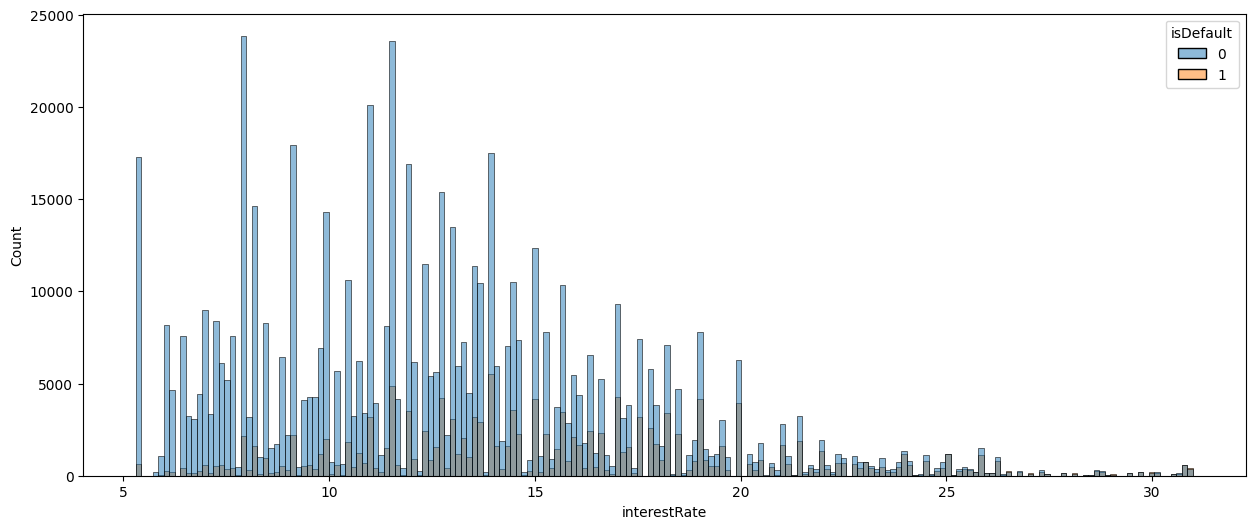

In [98]:
PlotNumFeautre('interestRate')

In [99]:
interestRate_bin_enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_df['interestRate'] = interestRate_bin_enc.fit_transform(train_df[['interestRate']])
test_df['interestRate'] = interestRate_bin_enc.transform(test_df[['interestRate']])

## 1.2 installment——binning

max:1715.42, min:15.69


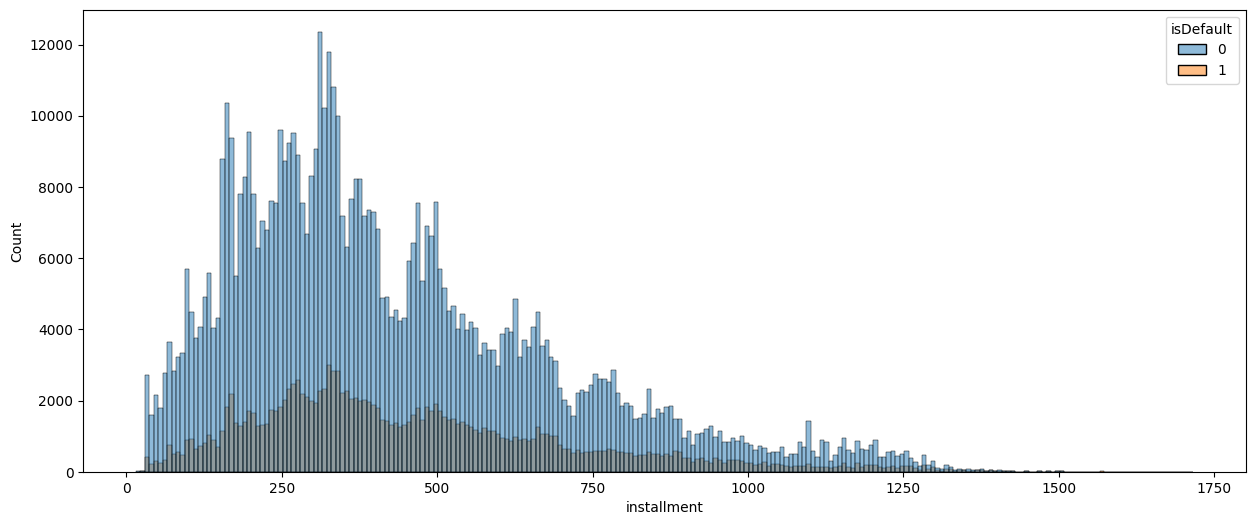

In [107]:
PlotNumFeautre('installment')

In [108]:
installment_bin_enc = KBinsDiscretizer(n_bins=6, encode= 'ordinal', strategy='uniform')
train_df['installment'] = installment_bin_enc.fit_transform(train_df[['installment']])
test_df['installment'] = installment_bin_enc.transform(test_df[['installment']])

## 1.3 employmentTitle——binning

max:378351.0, min:0.0


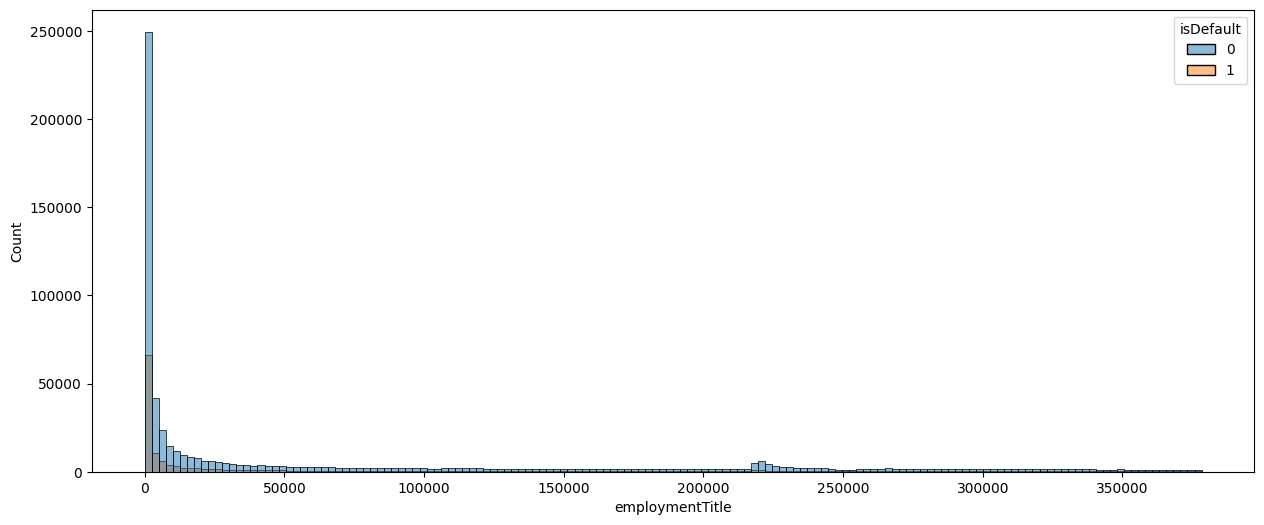

In [110]:
PlotNumFeautre('employmentTitle')

In [119]:
employmentTitle_imputer = SimpleImputer()
train_df['employmentTitle'] = employmentTitle_imputer.fit_transform(train_df[['employmentTitle']])
employmentTitle_bin_enc = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')

train_df['employmentTitle'] = employmentTitle_bin_enc.fit_transform(train_df[['employmentTitle']])

## 1.4 annualInco binning

In [ ]:
1

In [ ]:
annualIncome_binary_enc = Binarizer()

In [125]:
train_df['annualIncome'].value_counts()

60000.00    30682
50000.00    27062
65000.00    23126
70000.00    22076
40000.00    21057
            ...  
60608.00        1
77292.00        1
38778.84        1
71928.00        1
41389.04        1
Name: annualIncome, Length: 44926, dtype: int64

KeyboardInterrupt: 

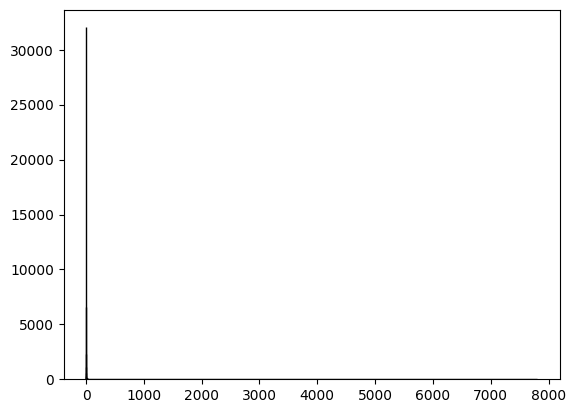

In [127]:
sns.histplot(data = train_df['annualIncome'].value_counts())